In [45]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot

In [46]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

In [47]:
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

In [48]:
scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 16585005824.5
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 297176184920.0
ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 5109802011.3125
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 5913597.69140625
WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8 7567071.1328125
DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 9614508.69140625
GJets_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 4650962.65625
ZZ_TuneCP5_13TeV-pythia8 1978776.73828125
GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 19051574.2890625
WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 25415128.9140625
DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 11516745.765625
DYJetsToLL_M-50_HT-1200to2500_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 531566.85546875
ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 266470389.4375
DYJetsToLL_M-50_HT-

In [49]:
process = hist.Cat("process", "Process", sorting='placement')

process_cats = ("pdataset",)
process_map = OrderedDict()
#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["Zjets"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)

signal_cats = ("pdataset",)
signal_map = OrderedDict() ### for signal samples
signal_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
signal_map["Mhs_70"] = ("*Mhs_70*",)
signal_map["Mhs_90"] = ("*Mhs_90*",)
signal_map["MonoJet"] = ("MonoJet*",)  ## signals
signal_map["MonoW"] = ("MonoW*",)    ## signals
signal_map["MonoZ"] = ("MonoZ*",)    ## signals
signal_hists = {}

for key in hists.keys():
    signal_hists[key] = hists[key].group(process, signal_cats, signal_map)
    hists[key] = hists[key].group(process, process_cats, process_map)
    #print(key)

In [50]:
data_hists={}
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [51]:
data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in data_hists.keys():
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

In [52]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [53]:
exp = 0
region = 'iszeroL'
jet_selection = 'baggy'
data = 'MET'
print('------------------')
print('------------------')
print('Category:',region)
print('------------------')
for p in hists['recoil'].identifiers('process'):
    yld = np.sum(hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    exp += yld
    print(p, '%.1f' % yld)
      
for p in signal_hists['recoil'].identifiers('process'):
    yld = np.sum(signal_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process', p).values(overflow='all')[()])
    print(p, '%.1f' % yld)
    
print('------------------')
print('Total expected:', '%.1f' % exp)
print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',jet_selection).project('region',region).project('process',data).values(overflow='all')[()]))   
print('------------------')
print('------------------')
print()

------------------
------------------
Category: iszeroL
------------------
Hbb 284681.0
Zjets 4359121025.8
Diboson 21171892116.2
ST 12833284111.1
TT 854638753723.7
Wjets 2607410362761.0
------------------
Total expected: 3500413698418.8
Total observed: 777236.6
------------------
------------------



/Users/matteoc/.local/lib/python3.7/site-packages/coffea/hist/plot.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)


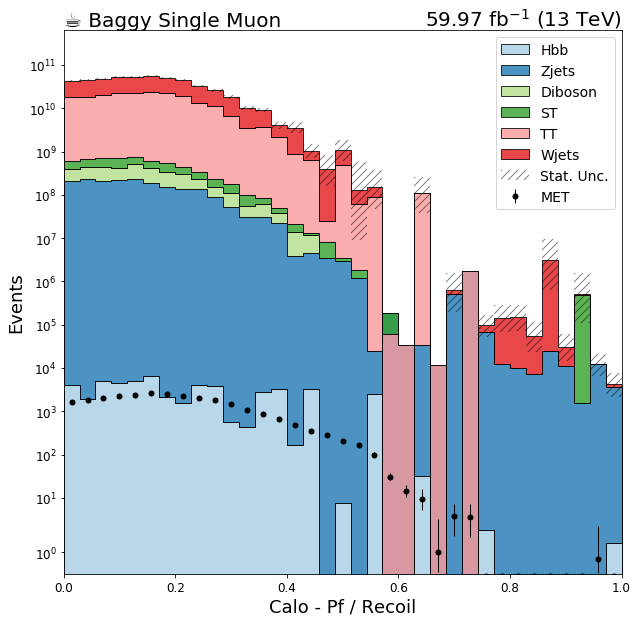

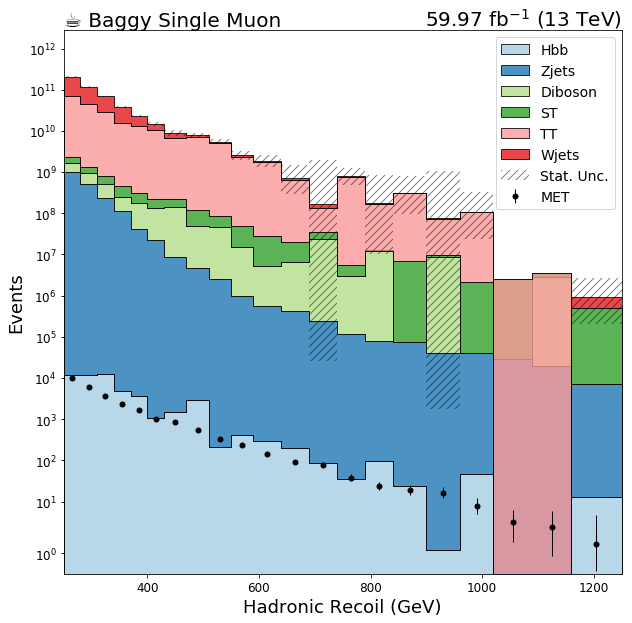

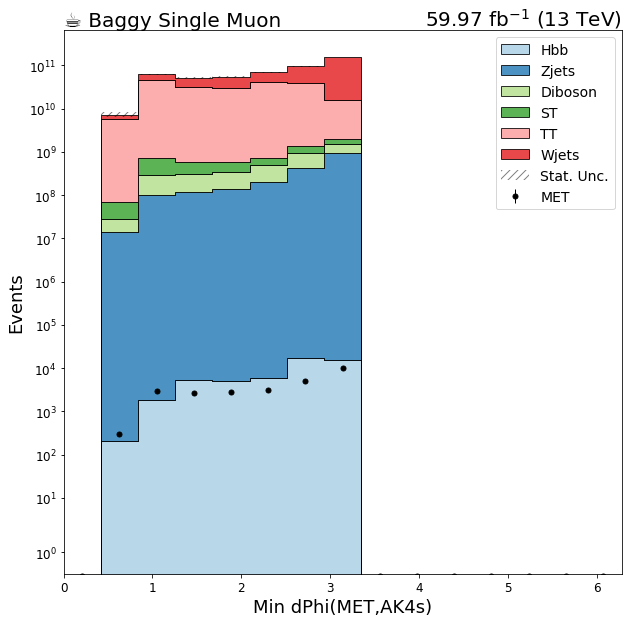

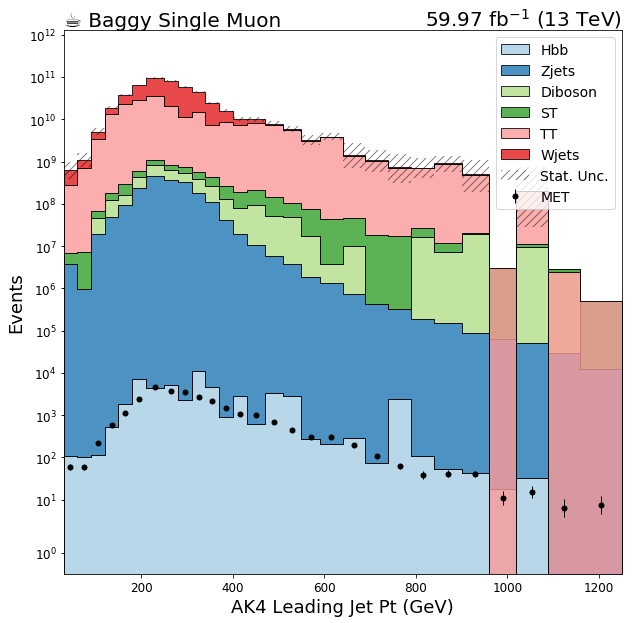

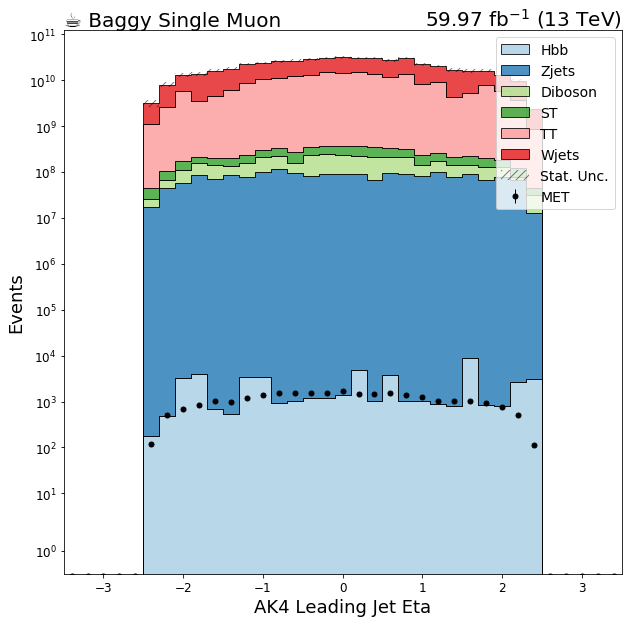

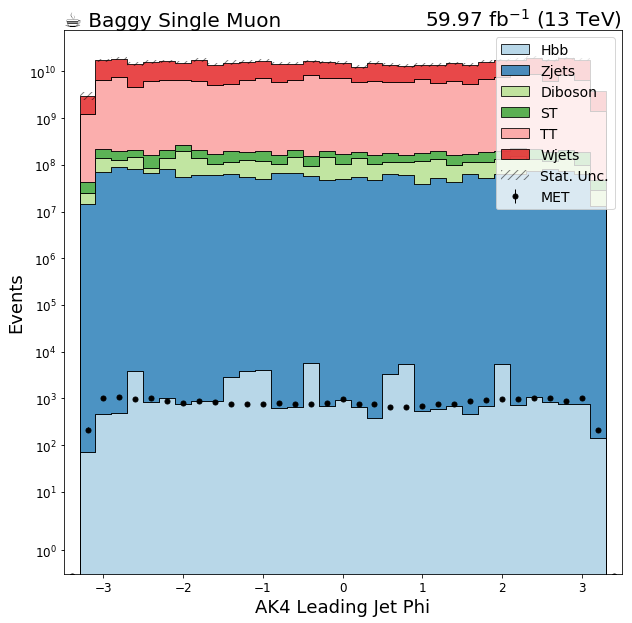

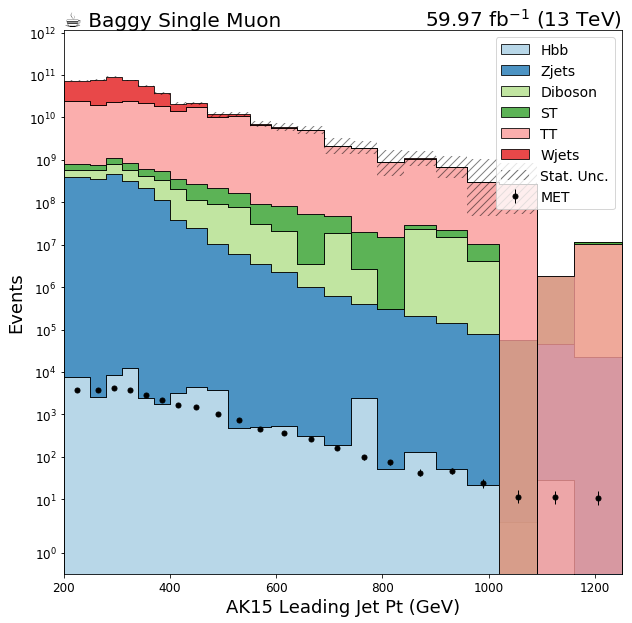

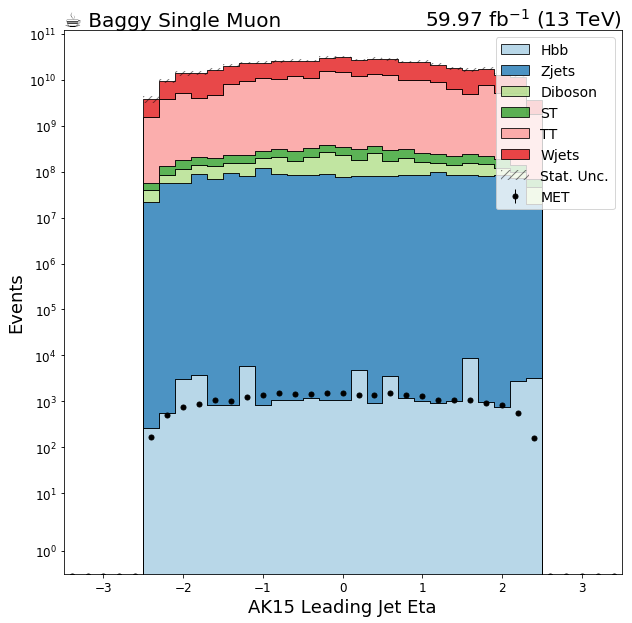

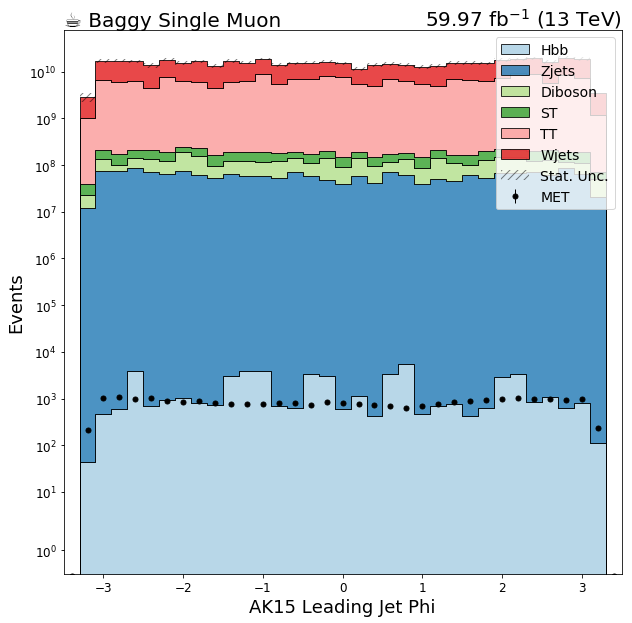

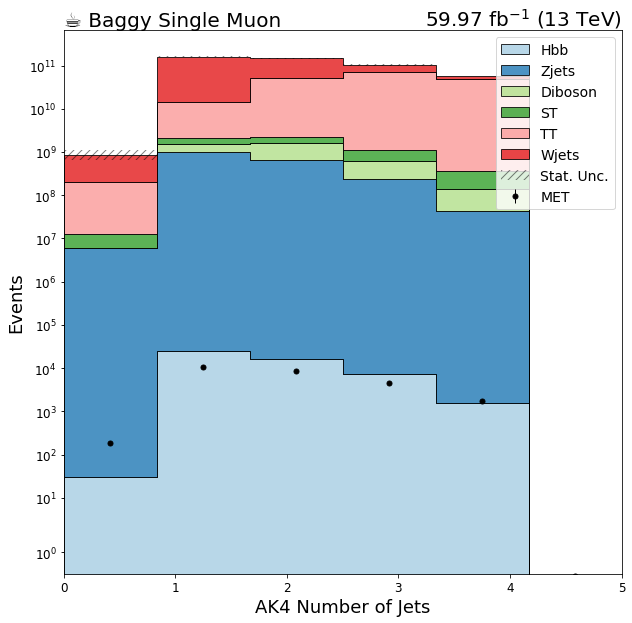

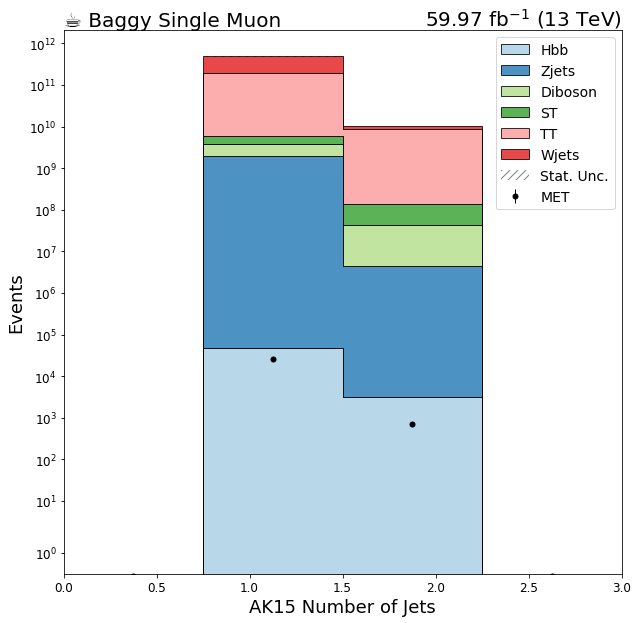

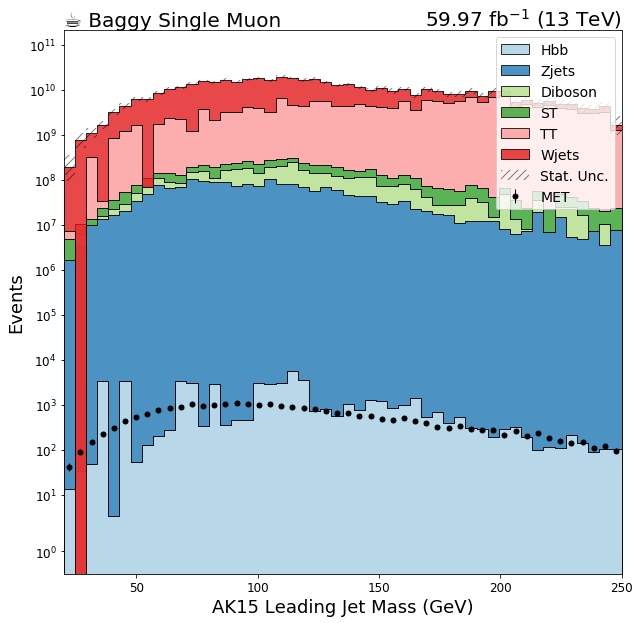

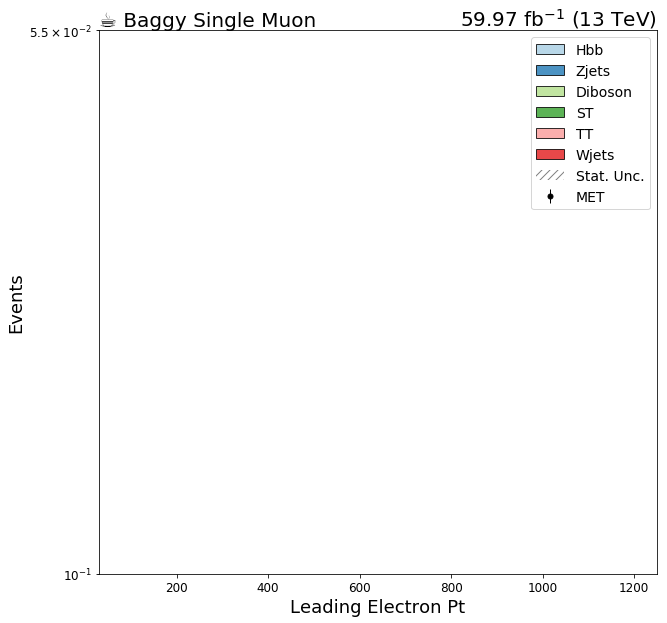

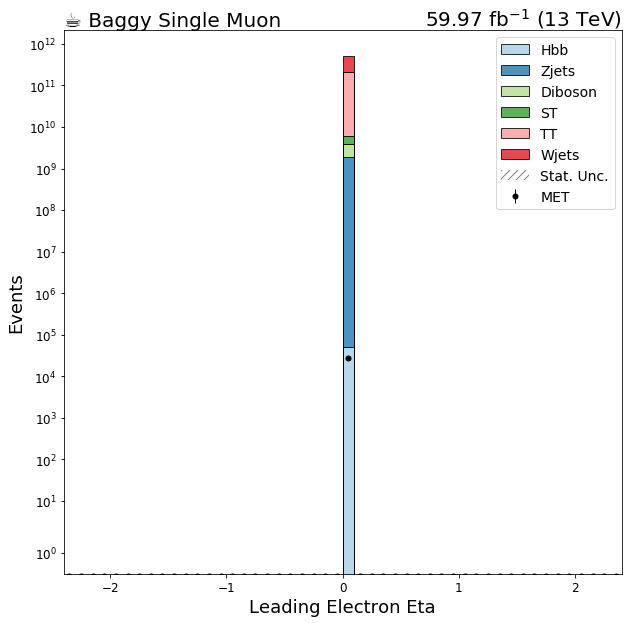

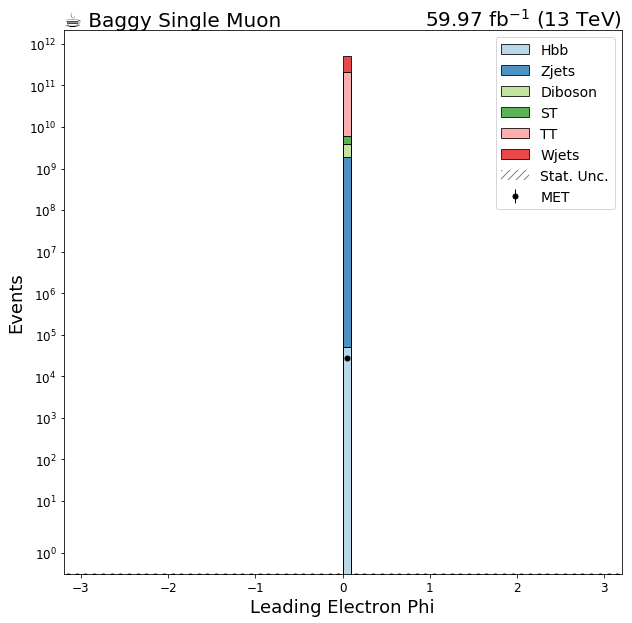

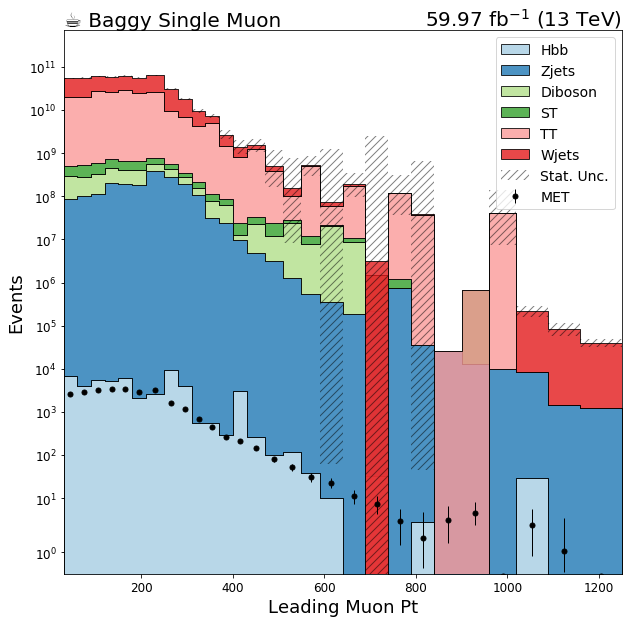

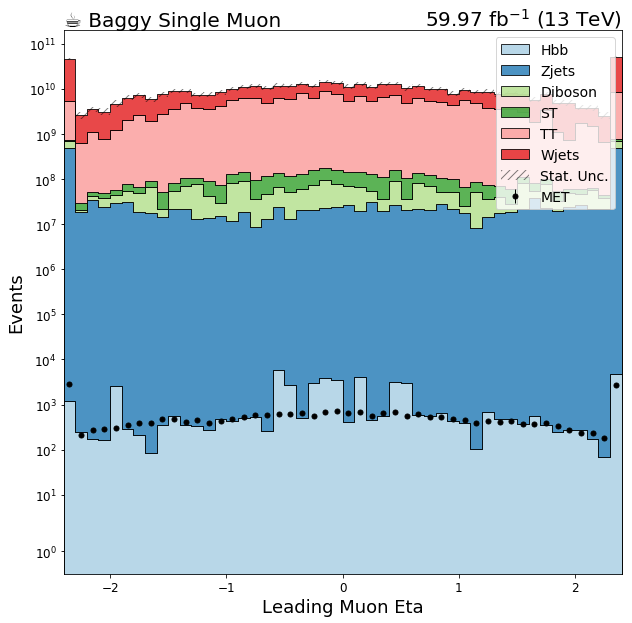

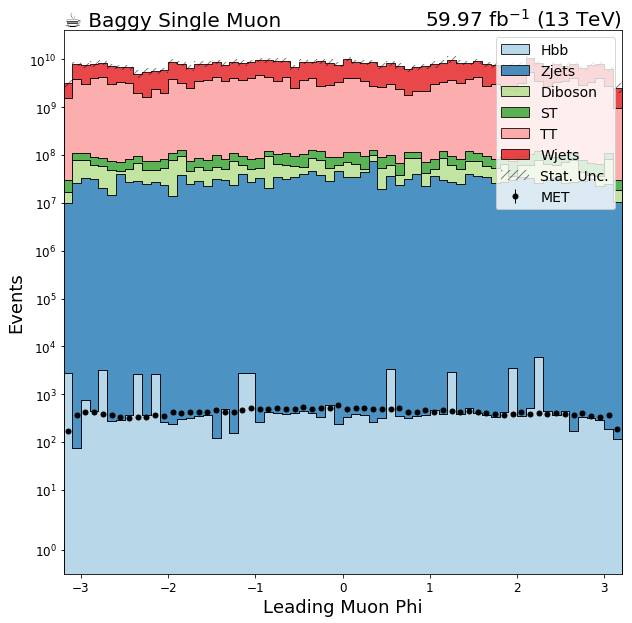

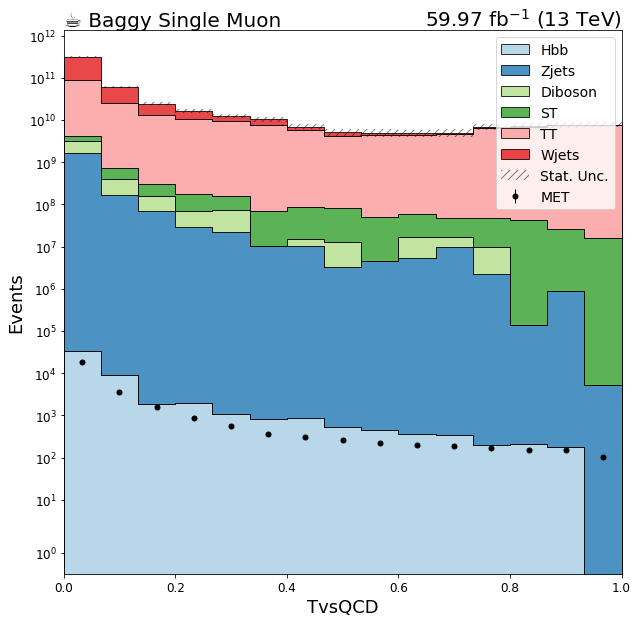

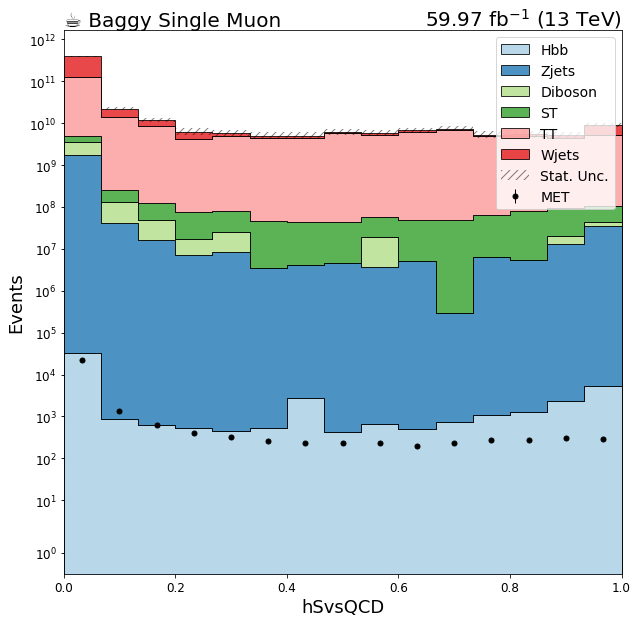

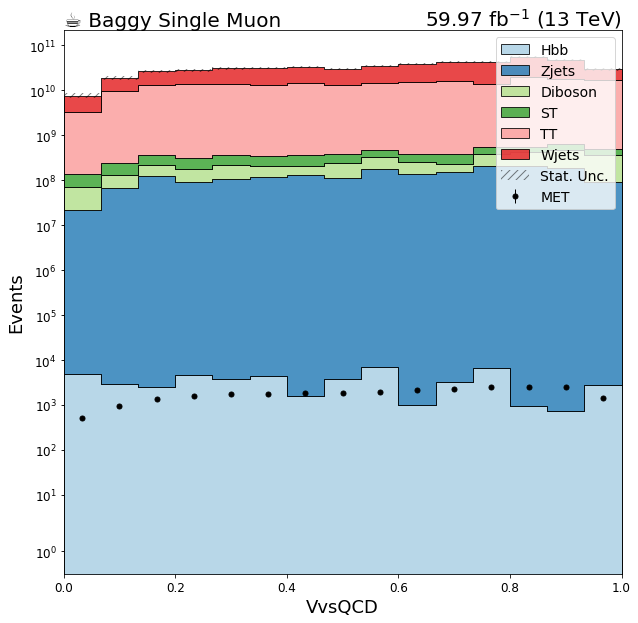

In [54]:
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','isoneM'),
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','isoneM'),
            overlay="process",
            ax=ax,
            clear=False,
            stack=True,
            line_opts=None,    
            fill_opts=fill_opts,
            error_opts=error_opts
               )
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('symlog')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Baggy Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

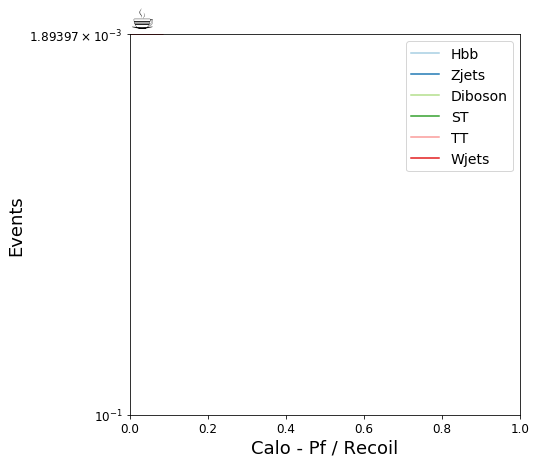

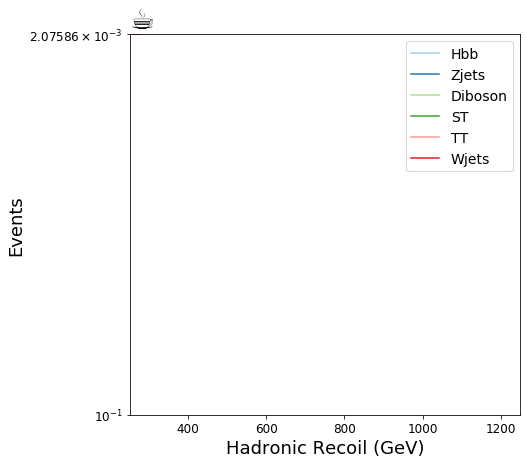

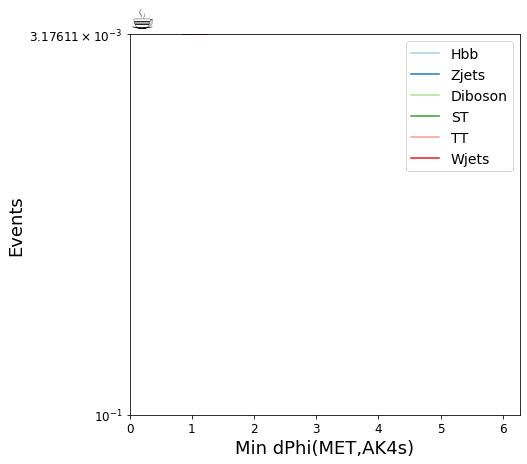

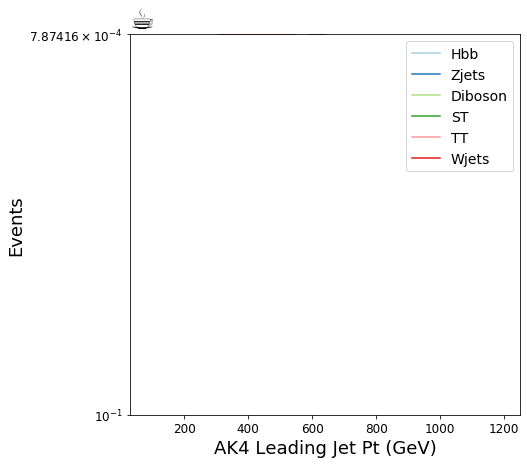

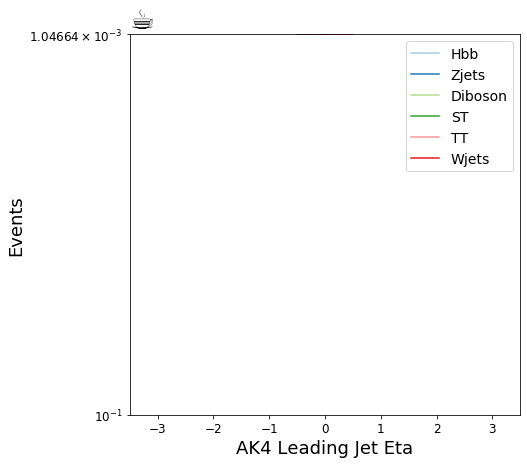

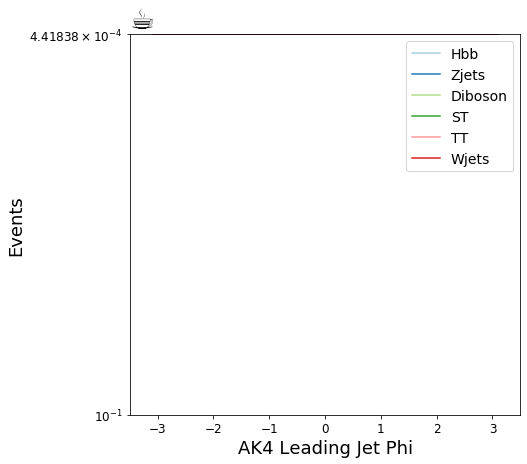

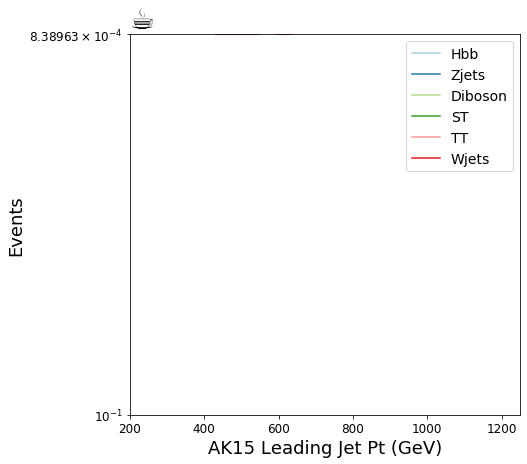

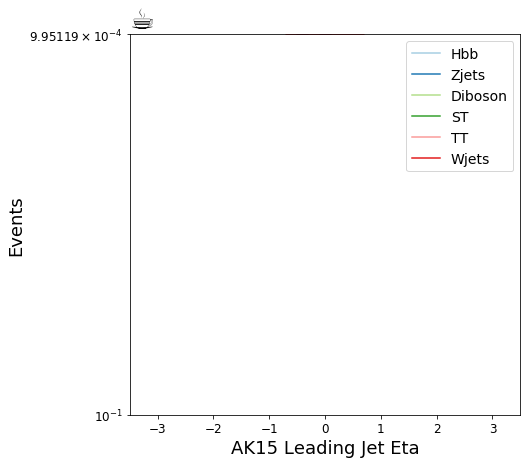

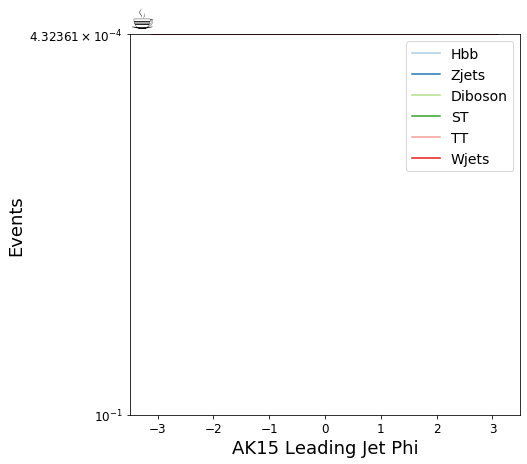

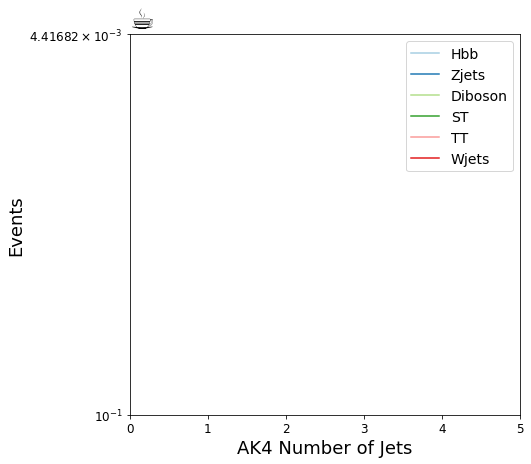

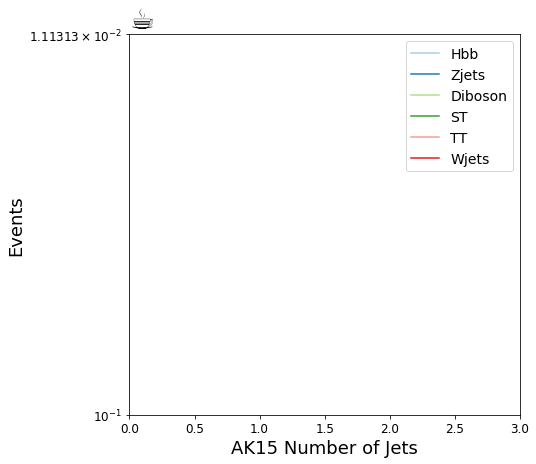

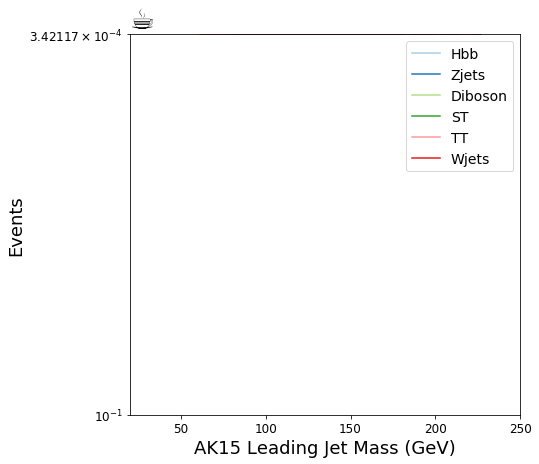

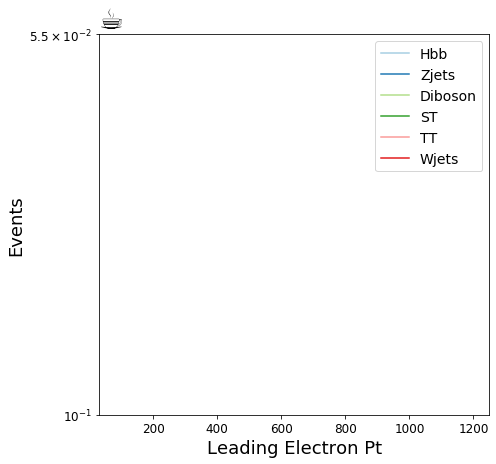

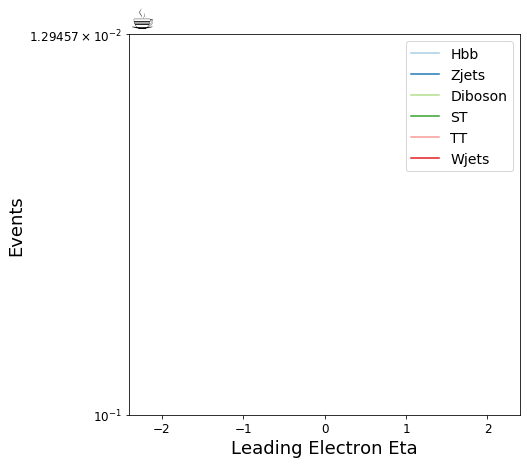

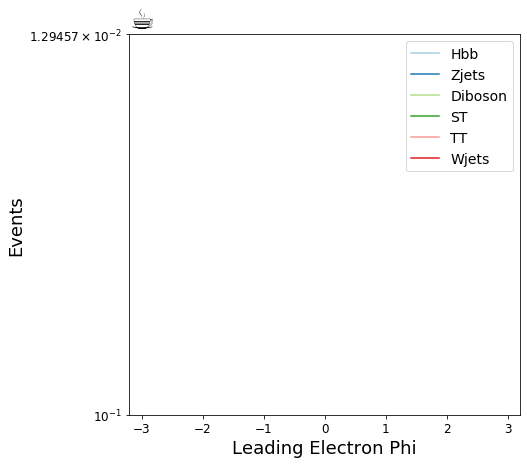

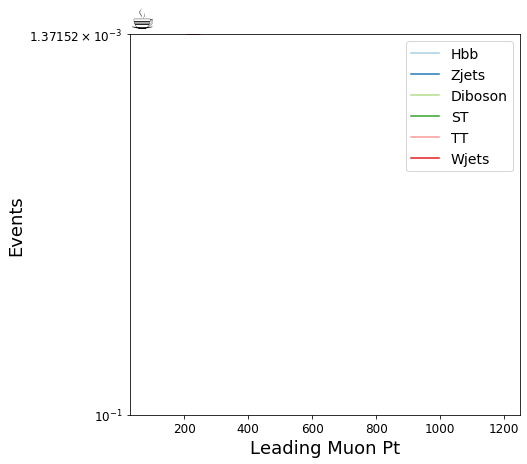

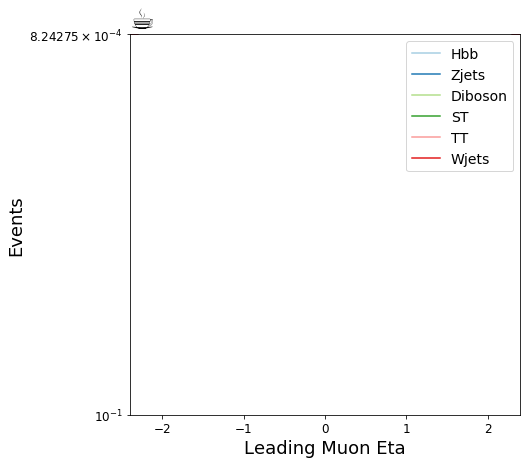

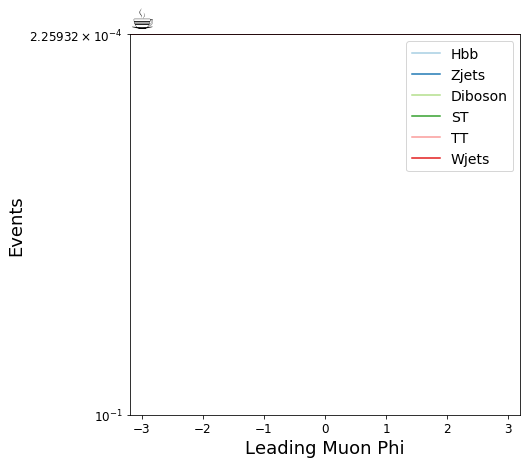

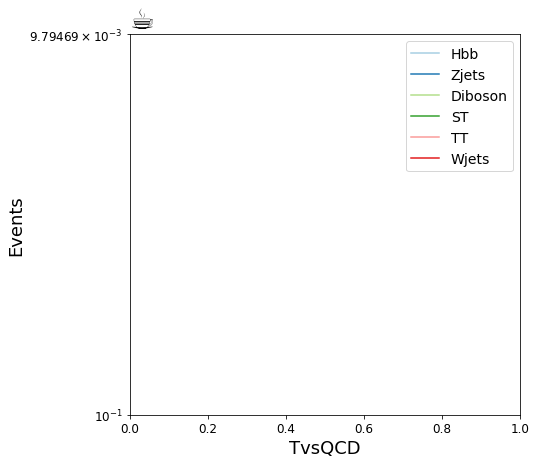

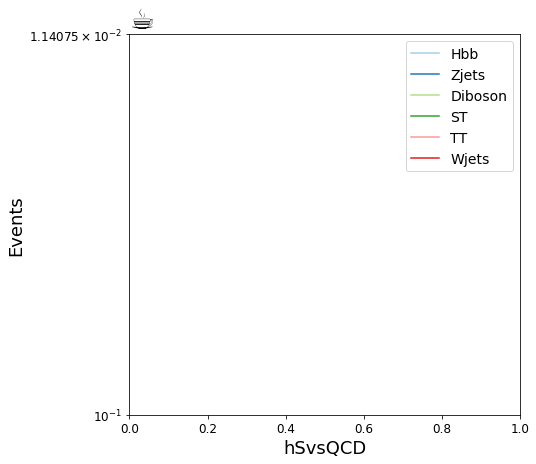

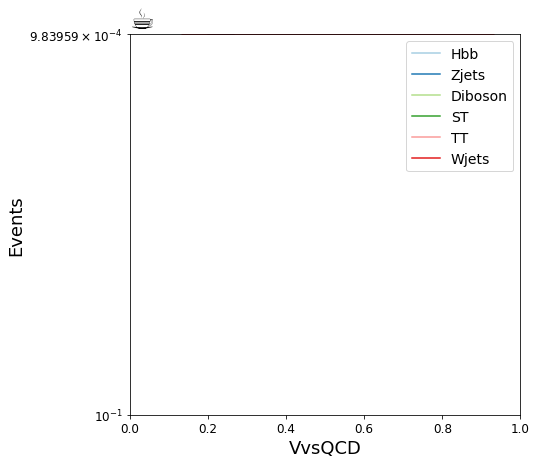

In [19]:
for key in hists.keys():
    if key=='sumw': continue

    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','isoneM'), 
                overlay="process",
                ax=ax, 
                clear=False,
                stack=False,
                line_opts={},
               # density=1
               )
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('symlog')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists["recoil"].project('jet_selection').project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)